In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from bayesfilt import KalmanFilter, ConstantVelocity1D

In [4]:
# generate noisy data
dt = 0.1
tlen = 60
ncycles = 4
t = np.linspace(0,tlen,int(tlen/dt)+1)
ytrue = np.array([np.sin(t*ncycles*2.*np.pi/tlen), np.cos(t*ncycles*2.*np.pi/tlen)*ncycles*2.*np.pi/tlen])
yobs = ytrue.copy()
yobs[0,:] += np.random.randn(t.size)*0.2
yobs[1,:] += np.random.randn(t.size)*0.1

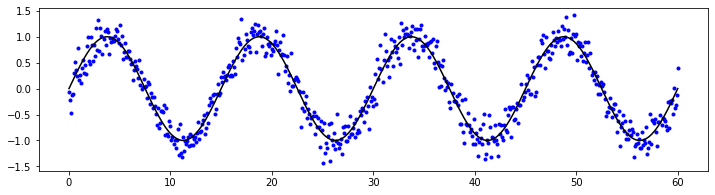

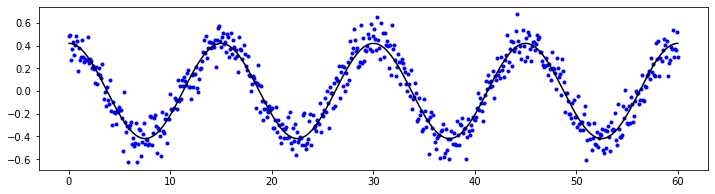

In [5]:
for i in range(yobs.shape[0]):
    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(t,yobs[i,:], '.b')
    ax.plot(t,ytrue[i,:], '-k')

In [6]:
# kalman filter
mm = ConstantVelocity1D()
dt = 0.05
mm.update(dt = dt, sigmas = [0.03])
ikf = KalmanFilter(nx = 2, ny = 2, dt = dt)
ikf.F = mm.F.copy()
ikf.Q = mm.Q.copy()
ikf.H = np.eye(2)
ikf.R = np.diag([0.2, 0.1])**2
ikf.initiate_state(t[0], yobs[:,0], np.diag([0.2, 0.1]))
ikf.filter(t[1:], [ix for ix in yobs[:,1:].T])
ikf.smoother()

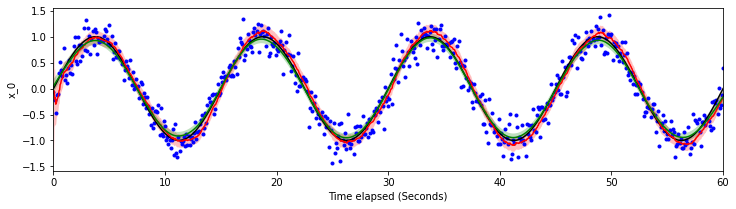

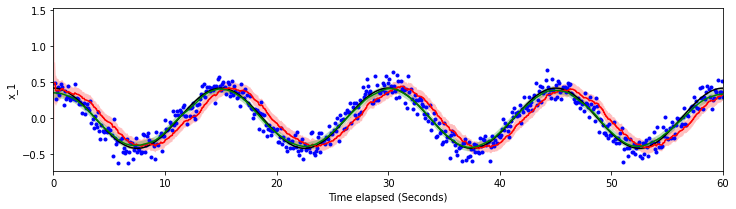

In [7]:
for i in range(ikf.nx):
    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(t, yobs[i,:], '.b')
    ax.plot(t, ytrue[i,:], '-k')
    ikf.plot_state(ax, i, 'r', 'filter', linestyle='-')
    ikf.plot_state(ax, i, 'g', 'smoother', linestyle='-')
    #ax.set_xlim([20,40])

(10.0, 40.0)

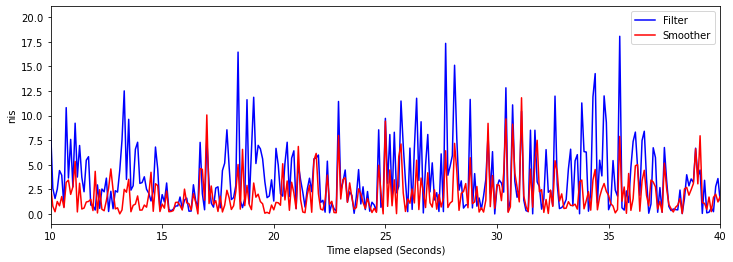

In [8]:
fig, ax = plt.subplots(figsize=(12,4))
# ikf.plot_metric(ax, 'loglik', color='b', ftype='filter', label='Filter')
# ikf.plot_metric(ax, 'loglik', color='r', ftype='smoother', label='Smoother')

ikf.plot_metric(ax, 'nis', color='b', ftype='filter', label='Filter')
ikf.plot_metric(ax, 'nis', color='r', ftype='smoother', label='Smoother')

# ikf.plot_metric(ax, 'nees', color='b', ftype='filter', label='Filter')
# ikf.plot_metric(ax, 'nees', color='r', ftype='smoother', label='Smoother')

ax.legend()
ax.set_xlim([10, 40])
#ax.set_ylim([0.,2])

In [9]:
ikf.metrics

{'nis': 2156.8232108758534,
 'nees': 192.41941690099827,
 'loglik': 121.28305358750015}

In [10]:
ikf.metrics_smoother

{'nis': 1224.7921562326144,
 'nees': 31.2683462953309,
 'loglik': 1232.9684415587367}